<a href="https://colab.research.google.com/github/PandikalaPk/AUSSIG-ML/blob/main/Task_1P.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SIG720- Machine Learning




**“Sensor readings, with temperature, light, humidity every 5 minutes at 8
locations (trial, 2014 to 2015)”**

*Description*

In 2012, Council and ARUP partnered with the University of Melbourne on a three year Australian Research Council Linkage Grant for Creating a Smart City through Internet of Things." The aim of the research was to develop new systems and algorithms that can help City administrators remotely monitor, understand and interpret real time information on urban environments" The researchers are now applying the research in the City by deploying a three month 'real-world' data collection and testing trial. The environmental sensors, measuring light levels, humidity and temperature, have been deployed at Fitzroy Gardens and Library at the Dock. The data collected will assist the Urban Landscapes branch to better understand and communicate the impact of canopy cover for urban cooling

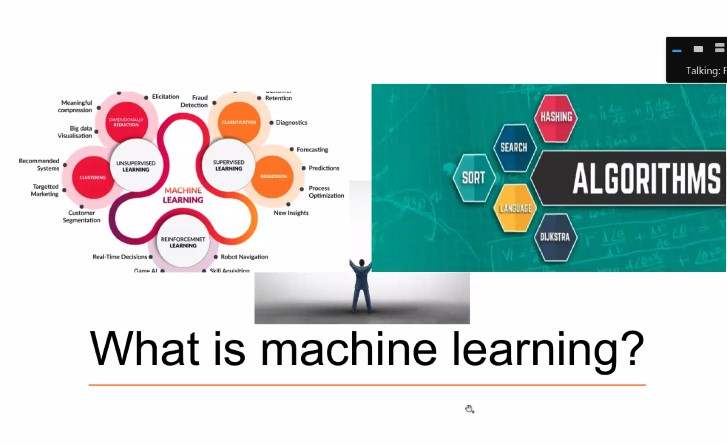

# TASK 1P

1. Read “Sensor readings, with temperature, light, humidity every 5 minutes at 8
locations (trial, 2014 to 2015)” and print the feature name with numbers of missing
entries.
2. Fill in the missing entries. For filling any feature, you can use either the mean or
median value of the feature values from observed entries. Explain the reason behind
your choice and print replacement value of each feature.
3. Use a histogram to show the distribution of the variable “location”. Explain the
distribution and show how many locations are there in total.
4. Encode the categorical variable “location" using an appropriate encoding approach
and display the encoded values. Justify your selection of encoding approaches.
5. Apply the min-max scaling on features "[boardtype, boardid ,temp_max, temp_min,
temp_avg,light_max, light_min,light_avg, humidity_min, humidity_max,
humidity_avg]" . Plot distribution of first six features before and after scaling. Is there
any difference? Please explain.

1.Read “Sensor readings, with temperature, light, humidity every 5 minutes at 8
locations (trial, 2014 to 2015)” and print the feature name with numbers of missing

In [1]:
#Import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display import HTML
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import mode
import pickle

In [2]:
#Uploading input file
from google.colab import files
uploaded = files.upload()

Saving sensor-readings-with-temperature-light-humidity-every-5-minutes-at-8-locations-t.csv to sensor-readings-with-temperature-light-humidity-every-5-minutes-at-8-locations-t.csv


In [4]:
#Reading CSV file using pandas and assigning that into a dataframe
dataframe = pd.read_csv("sensor-readings-with-temperature-light-humidity-every-5-minutes-at-8-locations-t.csv")

In [5]:
dataframe.head()

,timestamp,mac,boardtype,boardid,temp_max,temp_min,temp_avg,light_max,light_min,light_avg,...,humidity_max,humidity_avg,model,latitude,longitude,elevation,location,rowid,Position,geolocation
0,2015-01-24T16:15:00+05:30,0013a20040b31571,1,510,19.4,19.4,19.4,0.9,0.9,0.9,...,52.7,52.7,ENV,-37.819712,144.941325,NaN,Docklands Library,510-20150124104500,NaN,"-37.8197121, 144.9413253"
1,2015-01-24T16:45:00+05:30,0013a20040b5b337,1,511,19.7,19.7,19.7,10.6,10.6,10.6,...,50.2,50.2,ENV,-37.819500,144.941889,NaN,Docklands Library,511-20150124111500,NaN,"-37.8195002, 144.9418888"
2,2015-01-24T16:45:00+05:30,0013a20040b31583,1,509,19.7,19.7,19.7,3.1,3.1,3.1,...,57.9,57.9,ENV,-37.819904,144.940485,NaN,Docklands Library,509-20150124111500,NaN,"-37.8199043, 144.9404851"
3,2015-01-24T17:25:00+05:30,0013a20040b31583,1,509,19.7,19.7,19.7,3.1,3.1,3.1,...,53.7,53.7,ENV,-37.819904,144.940485,NaN,Docklands Library,509-20150124115500,NaN,"-37.8199043, 144.9404851"
4,2015-01-24T17:25:00+05:30,0013a20040b31571,1,510,18.7,18.7,18.7,1.0,1.0,1.0,...,48.6,48.6,ENV,-37.819712,144.941325,NaN,Docklands Library,510-20150124115500,NaN,"-37.8197121, 144.9413253"


In [6]:
dataframe.dtypes

timestamp        object
mac              object
boardtype         int64
boardid           int64
temp_max        float64
temp_min        float64
temp_avg        float64
light_max       float64
light_min       float64
light_avg       float64
humidity_min    float64
humidity_max    float64
humidity_avg    float64
model            object
latitude        float64
longitude       float64
elevation       float64
location         object
rowid            object
Position        float64
geolocation      object
dtype: object

In [7]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56570 entries, 0 to 56569
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     56570 non-null  object 
 1   mac           56570 non-null  object 
 2   boardtype     56570 non-null  int64  
 3   boardid       56570 non-null  int64  
 4   temp_max      56570 non-null  float64
 5   temp_min      56570 non-null  float64
 6   temp_avg      56570 non-null  float64
 7   light_max     56570 non-null  float64
 8   light_min     56570 non-null  float64
 9   light_avg     56570 non-null  float64
 10  humidity_min  56570 non-null  float64
 11  humidity_max  56570 non-null  float64
 12  humidity_avg  56570 non-null  float64
 13  model         56570 non-null  object 
 14  latitude      56570 non-null  float64
 15  longitude     56570 non-null  float64
 16  elevation     34975 non-null  float64
 17  location      56570 non-null  object 
 18  rowid         56570 non-nu

In [8]:
dataframe.columns[dataframe.isnull().any()]

Index(['elevation', 'Position'], dtype='object')

There are two feature with null values Elevation and Position.

In [9]:
print(dataframe.isna().sum())

timestamp           0
mac                 0
boardtype           0
boardid             0
temp_max            0
temp_min            0
temp_avg            0
light_max           0
light_min           0
light_avg           0
humidity_min        0
humidity_max        0
humidity_avg        0
model               0
latitude            0
longitude           0
elevation       21595
location            0
rowid               0
Position        56570
geolocation         0
dtype: int64


In [10]:
missing = dataframe.isnull().sum()
print(missing)

timestamp           0
mac                 0
boardtype           0
boardid             0
temp_max            0
temp_min            0
temp_avg            0
light_max           0
light_min           0
light_avg           0
humidity_min        0
humidity_max        0
humidity_avg        0
model               0
latitude            0
longitude           0
elevation       21595
location            0
rowid               0
Position        56570
geolocation         0
dtype: int64


Elevation(21595) and Position(56570) are missing entries

2.Fill in the missing entries. For filling any feature, you can use either the mean or
median value of the feature values from observed entries. Explain the reason behind
your choice and print replacement value of each feature.

In [11]:
dataframe.fillna(dataframe.Position)
dataframe.fillna(dataframe.elevation)

,timestamp,mac,boardtype,boardid,temp_max,temp_min,temp_avg,light_max,light_min,light_avg,...,humidity_max,humidity_avg,model,latitude,longitude,elevation,location,rowid,Position,geolocation
0,2015-01-24T16:15:00+05:30,0013a20040b31571,1,510,19.4,19.4,19.4,0.9,0.9,0.9,...,52.7,52.7,ENV,-37.819712,144.941325,NaN,Docklands Library,510-20150124104500,NaN,"-37.8197121, 144.9413253"
1,2015-01-24T16:45:00+05:30,0013a20040b5b337,1,511,19.7,19.7,19.7,10.6,10.6,10.6,...,50.2,50.2,ENV,-37.819500,144.941889,NaN,Docklands Library,511-20150124111500,NaN,"-37.8195002, 144.9418888"
2,2015-01-24T16:45:00+05:30,0013a20040b31583,1,509,19.7,19.7,19.7,3.1,3.1,3.1,...,57.9,57.9,ENV,-37.819904,144.940485,NaN,Docklands Library,509-20150124111500,NaN,"-37.8199043, 144.9404851"
3,2015-01-24T17:25:00+05:30,0013a20040b31583,1,509,19.7,19.7,19.7,3.1,3.1,3.1,...,53.7,53.7,ENV,-37.819904,144.940485,NaN,Docklands Library,509-20150124115500,NaN,"-37.8199043, 144.9404851"
4,2015-01-24T17:25:00+05:30,0013a20040b31571,1,510,18.7,18.7,18.7,1.0,1.0,1.0,...,48.6,48.6,ENV,-37.819712,144.941325,NaN,Docklands Library,510-20150124115500,NaN,"-37.8197121, 144.9413253"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56565,2015-01-05T16:45:00+05:30,0013a20040b31583,1,509,18.1,18.1,18.1,3.4,3.4,3.4,...,61.4,61.4,ENV,-37.819904,144.940485,NaN,Docklands Library,509-20150105111500,NaN,"-37.8199043, 144.9404851"
56566,2015-01-05T16:50:00+05:30,0013a20040b4b755,1,508,17.1,17.1,17.1,2.1,2.1,2.1,...,50.3,50.3,ENV,-37.813408,144.979492,30.10,Fitzroy Gardens,508-20150105112000,NaN,"-37.8134078, 144.9794923"
56567,2015-01-05T16:55:00+05:30,0013a20040b31583,1,509,18.1,18.1,18.1,3.5,3.5,3.5,...,62.5,62.5,ENV,-37.819904,144.940485,NaN,Docklands Library,509-20150105112500,NaN,"-37.8199043, 144.9404851"
56568,2015-01-05T16:55:00+05:30,0013a20040b31571,1,510,17.1,17.1,17.1,1.3,1.3,1.3,...,54.1,54.1,ENV,-37.819712,144.941325,NaN,Docklands Library,510-20150105112500,NaN,"-37.8197121, 144.9413253"


In [12]:
dataframe.describe().T

,count,mean,std,min,25%,50%,75%,max
boardtype,56570.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
boardid,56570.0,507.918738,2.673337,501.000000,506.000000,509.000000,510.000000,511.000000
temp_max,56570.0,18.522650,5.498701,4.200000,14.800000,17.700000,21.900000,45.200000
temp_min,56570.0,18.522650,5.498701,4.200000,14.800000,17.700000,21.900000,45.200000
temp_avg,56570.0,18.522650,5.498701,4.200000,14.800000,17.700000,21.900000,45.200000
light_max,56570.0,48.674527,43.973493,0.000000,2.900000,49.900000,94.900000,98.700000
light_min,56570.0,48.674527,43.973493,0.000000,2.900000,49.900000,94.900000,98.700000
light_avg,56570.0,48.674527,43.973493,0.000000,2.900000,49.900000,94.900000,98.700000
humidity_min,56570.0,49.431043,13.413633,-24.900000,41.700000,51.000000,58.700000,102.500000
humidity_max,56570.0,49.431043,13.413633,-24.900000,41.700000,51.000000,58.700000,102.500000


In [14]:
percent_missing = dataframe.isnull().sum() * 100/len(dataframe)
missing_value = pd.DataFrame({'Column Name' : dataframe.columns,'Percentage_Missing' :percent_missing})
missing_value

,Column Name,Percentage_Missing
timestamp,timestamp,0.000000
mac,mac,0.000000
boardtype,boardtype,0.000000
boardid,boardid,0.000000
temp_max,temp_max,0.000000
temp_min,temp_min,0.000000
temp_avg,temp_avg,0.000000
light_max,light_max,0.000000
light_min,light_min,0.000000
light_avg,light_avg,0.000000


In [15]:
CentralTendacy = {}
CentralTendacy['Mean'] = dataframe['elevation'].mean()
CentralTendacy['Median'] = dataframe['elevation'].median()
CentralTendacy['Mode'] = dataframe['elevation'].mode()[0]

CentralTendacy

{'Mean': 12.973809578270192, 'Median': 2.74, 'Mode': 0.03}

In [16]:
CentralTendacy = {}
CentralTendacy['Mean'] = dataframe['Position'].mean()
CentralTendacy['Median'] = dataframe['Position'].median()

CentralTendacy

{'Mean': nan, 'Median': nan}

In [13]:
missing = dataframe.isnull().sum()
print(missing)

timestamp           0
mac                 0
boardtype           0
boardid             0
temp_max            0
temp_min            0
temp_avg            0
light_max           0
light_min           0
light_avg           0
humidity_min        0
humidity_max        0
humidity_avg        0
model               0
latitude            0
longitude           0
elevation       21595
location            0
rowid               0
Position        56570
geolocation         0
dtype: int64


In [18]:
dataframe.fillna(dataframe['elevation'].mean())

dataframe.fillna(dataframe['Position'].mean())

,timestamp,mac,boardtype,boardid,temp_max,temp_min,temp_avg,light_max,light_min,light_avg,...,humidity_max,humidity_avg,model,latitude,longitude,elevation,location,rowid,Position,geolocation
0,2015-01-24T16:15:00+05:30,0013a20040b31571,1,510,19.4,19.4,19.4,0.9,0.9,0.9,...,52.7,52.7,ENV,-37.819712,144.941325,NaN,Docklands Library,510-20150124104500,NaN,"-37.8197121, 144.9413253"
1,2015-01-24T16:45:00+05:30,0013a20040b5b337,1,511,19.7,19.7,19.7,10.6,10.6,10.6,...,50.2,50.2,ENV,-37.819500,144.941889,NaN,Docklands Library,511-20150124111500,NaN,"-37.8195002, 144.9418888"
2,2015-01-24T16:45:00+05:30,0013a20040b31583,1,509,19.7,19.7,19.7,3.1,3.1,3.1,...,57.9,57.9,ENV,-37.819904,144.940485,NaN,Docklands Library,509-20150124111500,NaN,"-37.8199043, 144.9404851"
3,2015-01-24T17:25:00+05:30,0013a20040b31583,1,509,19.7,19.7,19.7,3.1,3.1,3.1,...,53.7,53.7,ENV,-37.819904,144.940485,NaN,Docklands Library,509-20150124115500,NaN,"-37.8199043, 144.9404851"
4,2015-01-24T17:25:00+05:30,0013a20040b31571,1,510,18.7,18.7,18.7,1.0,1.0,1.0,...,48.6,48.6,ENV,-37.819712,144.941325,NaN,Docklands Library,510-20150124115500,NaN,"-37.8197121, 144.9413253"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56565,2015-01-05T16:45:00+05:30,0013a20040b31583,1,509,18.1,18.1,18.1,3.4,3.4,3.4,...,61.4,61.4,ENV,-37.819904,144.940485,NaN,Docklands Library,509-20150105111500,NaN,"-37.8199043, 144.9404851"
56566,2015-01-05T16:50:00+05:30,0013a20040b4b755,1,508,17.1,17.1,17.1,2.1,2.1,2.1,...,50.3,50.3,ENV,-37.813408,144.979492,30.10,Fitzroy Gardens,508-20150105112000,NaN,"-37.8134078, 144.9794923"
56567,2015-01-05T16:55:00+05:30,0013a20040b31583,1,509,18.1,18.1,18.1,3.5,3.5,3.5,...,62.5,62.5,ENV,-37.819904,144.940485,NaN,Docklands Library,509-20150105112500,NaN,"-37.8199043, 144.9404851"
56568,2015-01-05T16:55:00+05:30,0013a20040b31571,1,510,17.1,17.1,17.1,1.3,1.3,1.3,...,54.1,54.1,ENV,-37.819712,144.941325,NaN,Docklands Library,510-20150105112500,NaN,"-37.8197121, 144.9413253"


In [19]:
dataframe.fillna(dataframe['elevation'].median())
dataframe.fillna(dataframe['Position'].median())

,timestamp,mac,boardtype,boardid,temp_max,temp_min,temp_avg,light_max,light_min,light_avg,...,humidity_max,humidity_avg,model,latitude,longitude,elevation,location,rowid,Position,geolocation
0,2015-01-24T16:15:00+05:30,0013a20040b31571,1,510,19.4,19.4,19.4,0.9,0.9,0.9,...,52.7,52.7,ENV,-37.819712,144.941325,NaN,Docklands Library,510-20150124104500,NaN,"-37.8197121, 144.9413253"
1,2015-01-24T16:45:00+05:30,0013a20040b5b337,1,511,19.7,19.7,19.7,10.6,10.6,10.6,...,50.2,50.2,ENV,-37.819500,144.941889,NaN,Docklands Library,511-20150124111500,NaN,"-37.8195002, 144.9418888"
2,2015-01-24T16:45:00+05:30,0013a20040b31583,1,509,19.7,19.7,19.7,3.1,3.1,3.1,...,57.9,57.9,ENV,-37.819904,144.940485,NaN,Docklands Library,509-20150124111500,NaN,"-37.8199043, 144.9404851"
3,2015-01-24T17:25:00+05:30,0013a20040b31583,1,509,19.7,19.7,19.7,3.1,3.1,3.1,...,53.7,53.7,ENV,-37.819904,144.940485,NaN,Docklands Library,509-20150124115500,NaN,"-37.8199043, 144.9404851"
4,2015-01-24T17:25:00+05:30,0013a20040b31571,1,510,18.7,18.7,18.7,1.0,1.0,1.0,...,48.6,48.6,ENV,-37.819712,144.941325,NaN,Docklands Library,510-20150124115500,NaN,"-37.8197121, 144.9413253"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56565,2015-01-05T16:45:00+05:30,0013a20040b31583,1,509,18.1,18.1,18.1,3.4,3.4,3.4,...,61.4,61.4,ENV,-37.819904,144.940485,NaN,Docklands Library,509-20150105111500,NaN,"-37.8199043, 144.9404851"
56566,2015-01-05T16:50:00+05:30,0013a20040b4b755,1,508,17.1,17.1,17.1,2.1,2.1,2.1,...,50.3,50.3,ENV,-37.813408,144.979492,30.10,Fitzroy Gardens,508-20150105112000,NaN,"-37.8134078, 144.9794923"
56567,2015-01-05T16:55:00+05:30,0013a20040b31583,1,509,18.1,18.1,18.1,3.5,3.5,3.5,...,62.5,62.5,ENV,-37.819904,144.940485,NaN,Docklands Library,509-20150105112500,NaN,"-37.8199043, 144.9404851"
56568,2015-01-05T16:55:00+05:30,0013a20040b31571,1,510,17.1,17.1,17.1,1.3,1.3,1.3,...,54.1,54.1,ENV,-37.819712,144.941325,NaN,Docklands Library,510-20150105112500,NaN,"-37.8197121, 144.9413253"


In [34]:
dataframe['elevation'] = dataframe['elevation'].fillna(dataframe['elevation'].mode()[0])
print(dataframe['elevation'])

0         0.03
1         0.03
2         0.03
3         0.03
4         0.03
         ...  
56565     0.03
56566    30.10
56567     0.03
56568     0.03
56569    29.91
Name: elevation, Length: 56570, dtype: float64


In [37]:
print(dataframe['Position'])
dataframe['Position'] = dataframe['Position'].fillna(dataframe['Position'].mode()[0])

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
56565   NaN
56566   NaN
56567   NaN
56568   NaN
56569   NaN
Name: Position, Length: 56570, dtype: float64


One of the key points is to decide which imputation techniques to use for filling missing values with mean, median or mode. In this post, the central tendency measures such as mean, median, or mode is considered for imputation. The goal is to find out which is a better measure of the central tendency of data and use that value for filling missing values appropriately.

Plots such as box plots and density plots come very handily in deciding which imputation techniques to use. You can use the following code to print different plots such as box and distribution plots.

<Axes: ylabel='elevation'>

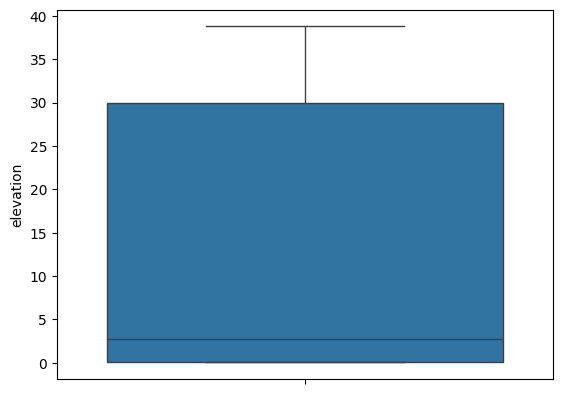

In [25]:
# Box plot
#
sns.boxplot(dataframe.elevation)

In [ ]:
sns.boxplot(dataframe.Position)
#ValueError: List of boxplot statistics and `positions` values must have same the length

<Axes: xlabel='elevation', ylabel='Density'>

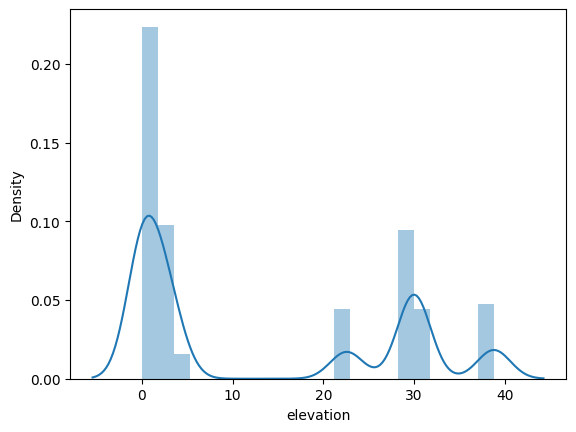

In [23]:
# Distribution plot
#
sns.distplot(dataframe.elevation)

<Axes: xlabel='Position'>

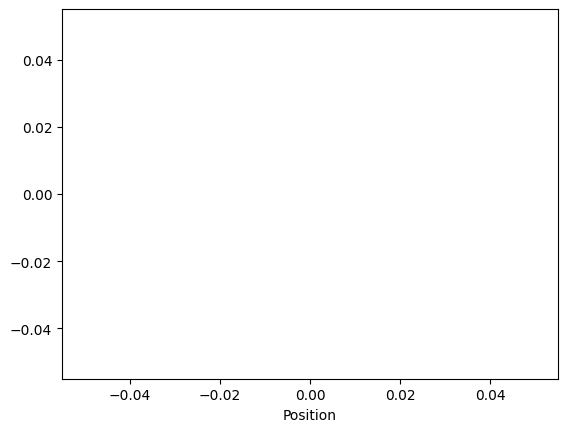

In [24]:
# Distribution plot
#
sns.distplot(dataframe.Position)

<Axes: ylabel='elevation'>

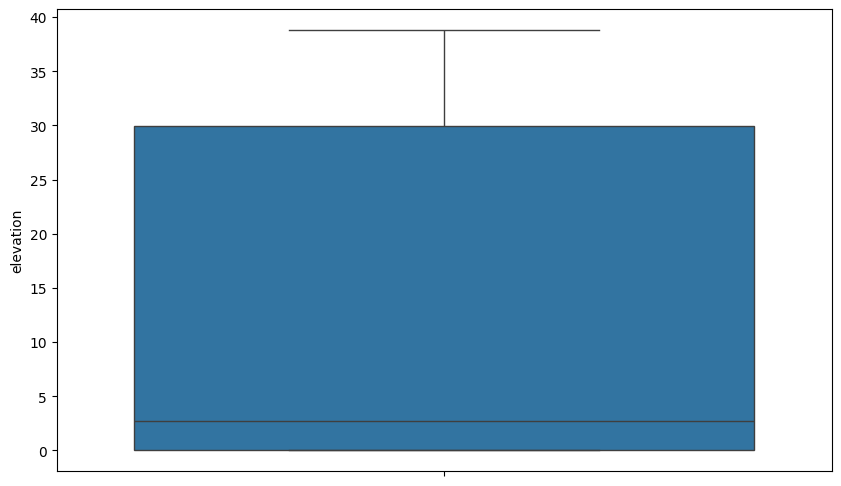

In [28]:
fig, ax = plt.subplots(figsize =(10,6))
sns.boxplot(dataframe.elevation)

<Axes: xlabel='elevation', ylabel='Density'>

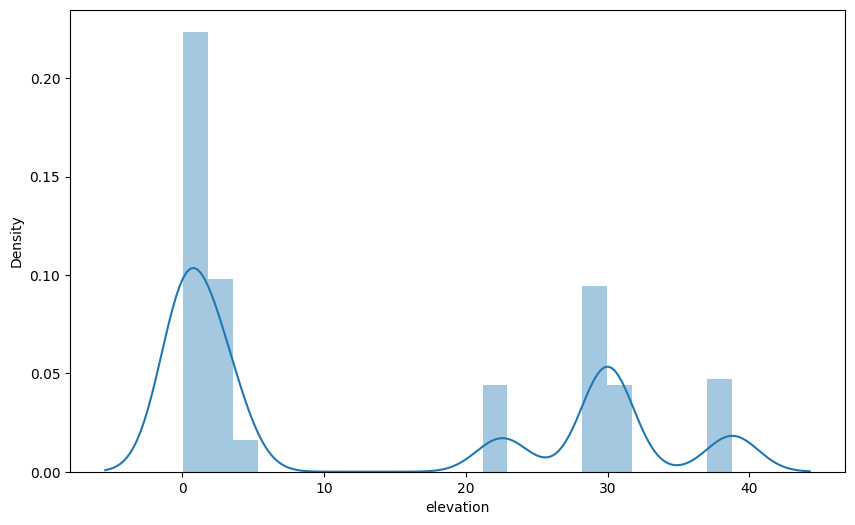

In [30]:
fig, ax = plt.subplots(figsize =(10,6))
sns.distplot(dataframe.elevation)

<Axes: xlabel='Position'>

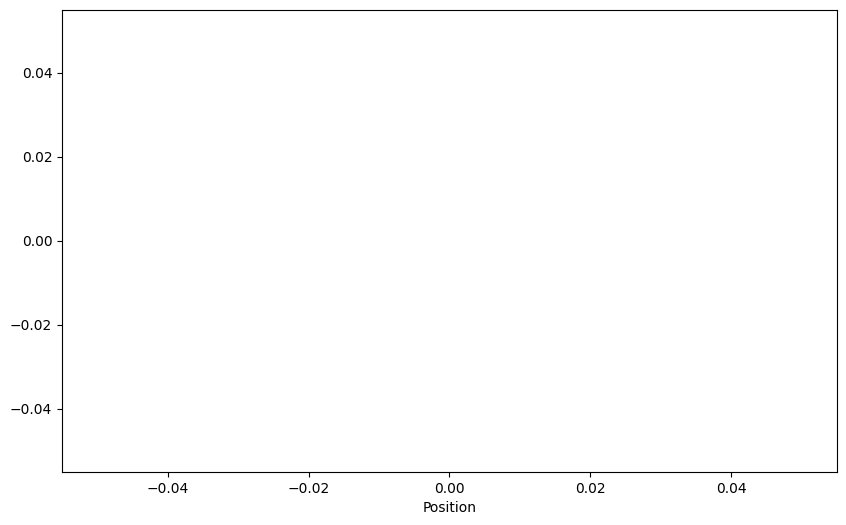

In [31]:
fig, ax = plt.subplots(figsize =(10,6))
sns.distplot(dataframe.Position)

**The most simple technique of all is to replace missing data with some constant value. The value can be any number that seemed appropriate.**

It is important to keep in mind that imputing missing values with summary statistics like mean, median, or mode can introduce bias in the data, as it assumes that the missing values are similar to the non-missing values. Additionally, the choice of imputation method can also affect the performance of the machine learning model, as it can impact the relationships between variables in the dataset

The following can be seen as standard guideline for using mean, median or mode for replacing the missing values:


1.   Mean imputation is often used when the missing values are numerical and the distribution of the variable is approximately normal.
2.   Median imputation is preferred when the distribution is skewed, as the median is less sensitive to outliers than the mean.
3.   Mode imputation is suitable for categorical variables or numerical variables with a small number of unique values.

The reason behind your choice and print replacement value of each feature

In [38]:
CentralTendacy = {}
CentralTendacy['Mean'] = dataframe['elevation'].mean()
CentralTendacy['Median'] = dataframe['elevation'].median()
CentralTendacy['Mode'] = dataframe['elevation'].mode()[0]

CentralTendacy

{'Mean': 8.032646986035001, 'Median': 0.03, 'Mode': 0.03}

In [ ]:
CentralTendacy = {}
CentralTendacy['Mean'] = dataframe['Position'].mean()
CentralTendacy['Median'] = dataframe['Position'].median()

CentralTendacy

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

# The reason why I .....
# plt.rc('text', usetex=True)
# import matplotlib as mpl
# mpl.rcParams.update(mpl.rcParamsDefault)

X shape: (100, 2)
Y shape: (100,)


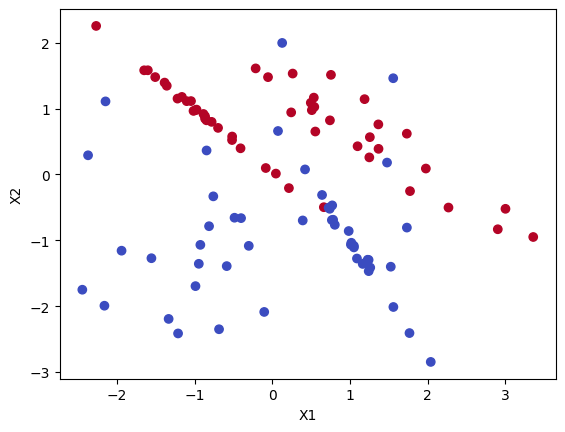

In [40]:
# sklearn toy dataset for binary classification
X, y  = make_classification(n_samples=100, n_features=2, n_redundant=0, n_informative=2, random_state=12)
print(f"X shape: {X.shape}")
print(f"Y shape: {y.shape}")

# plot the data
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.coolwarm)
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

Decision Boundary

A line that separates training examples of different classes A threshold halfway between observations on the edge of clusters

How to represent the decision boundary mathematically?

Hint: Think about Linear Regresssion. Now that the target variable y become a feature x

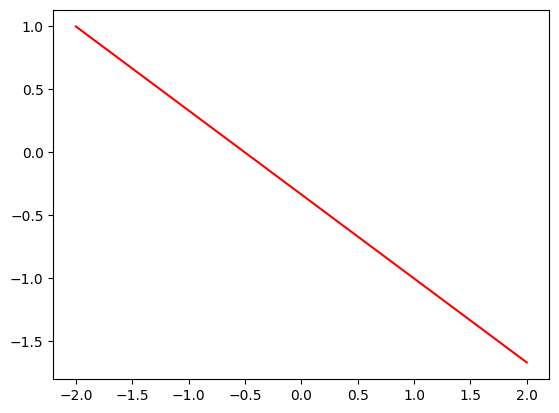

In [41]:
# y = w1*x1 + w0
# w1*x1 + w0 - y = 0
# Change the form to: w0 + w1*x1 + w2*x2 = 0

w = np.array([0.1, 0.2, 0.3])
# generate a grid of points in the space of x1 and x2 satisfying the equation w0 + w1*x1 + w2*x2 = 0
x1 = np.linspace(-2, 2, 100)
x2 = -(w[0] + w[1]*x1)/w[2]

# plot the line
plt.plot(x1, x2, 'r', label='Decision Boundary')

[hyperplane](https://en.wikipedia.org/wiki/Hyperplane) in high dimensional space

*   a point is a hyperplane in 1-dimensional space, a line is a hyperplane in 2-dimensional space, and a plane is a hyperplane in 3-dimensional space
*   a1x1+a2x2+......+anxn = b

Decision Boundary for Logistic Regression

*   What property does the decision boundary satisfy? Let's use 0.5 as probability threshold.

coefficients shape: (1, 2)
intercept shape: (1,)
xd: [-1  2]
yd: [ 0.37604052 -0.55544008]


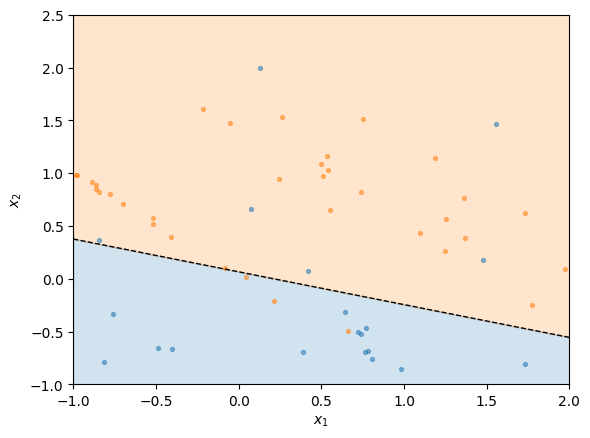

In [42]:
clf = LogisticRegression(multi_class="multinomial", solver="sag")
clf.fit(X, y)
print(f'coefficients shape: {clf.coef_.shape}')
print(f'intercept shape: {clf.intercept_.shape}')

# Retrieve the model parameters.
b = clf.intercept_[0]
w1, w2 = clf.coef_.T
# print(f'w1: {w1}')
# print(f'w2: {w2}')
# Calculate the intercept and gradient of the decision boundary.
c = -b/w2
m = -w1/w2

# Plot the data and the classification with the decision boundary.
xmin, xmax = -1, 2
xd = np.array([xmin, xmax])
print(f'xd: {xd}')
yd = m*xd + c
print(f'yd: {yd}')
plt.plot(xd, yd, 'k', lw=1, ls='--')

# plot the areas separated by the decision boundary
ymin, ymax = -1, 2.5
plt.fill_between(xd, yd, ymin, color='tab:blue', alpha=0.2)
plt.fill_between(xd, yd, ymax, color='tab:orange', alpha=0.2)

# plot the data points
plt.scatter(*X[y==0].T, s=8, alpha=0.5)
plt.scatter(*X[y==1].T, s=8, alpha=0.5)
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.ylabel(r'$x_2$')
plt.xlabel(r'$x_1$')

plt.show()

3.Use a histogram to show the distribution of the variable “location”. Explain the
distribution and show how many locations are there in total.

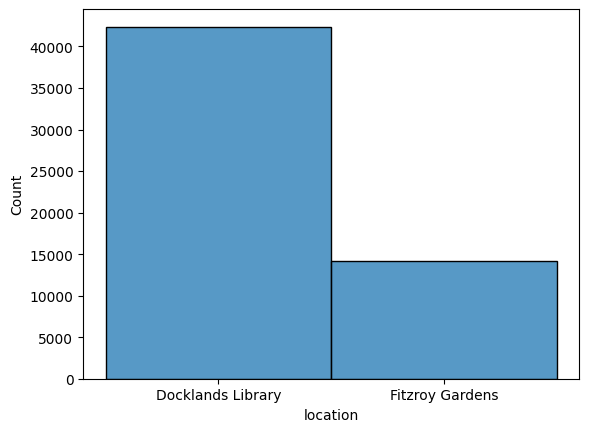

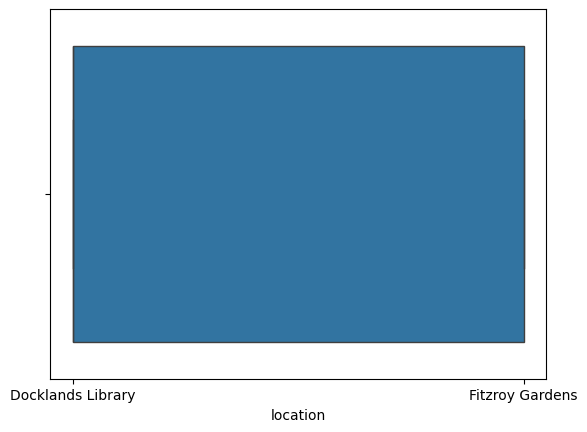

In [43]:
sns.histplot(data=dataframe,x='location')
plt.show()
sns.boxplot(data=dataframe,x='location')
plt.show()

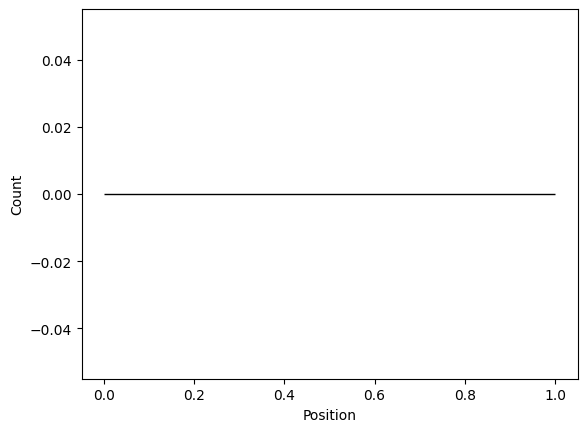

ValueError: List of boxplot statistics and `positions` values must have same the length

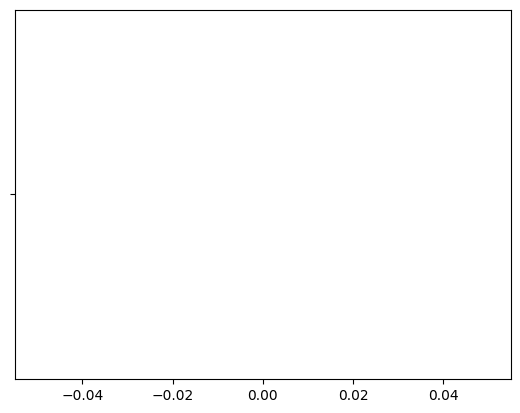

In [48]:
sns.histplot(data=dataframe,x='Position')
plt.show()
sns.boxplot(data=dataframe,x='Position')
plt.show()
#Position doesnt have samelength of value
##ValueError: List of boxplot statistics and `positions` values must have same the length

There are two locations,
1.   Docklands Library
2.   Fitzroy Gardens

4. Encode the categorical variable “location" using an appropriate encoding approach
and display the encoded values. Justify your selection of encoding approaches.

There are different Aproach for Encoding,

Approach #1 - Find and Replace

Approach #2 - Label Encoding

Approach #3 - One Hot Encoding

Approach #4 - Custom Binary Encoding

scikit-learn contrib package called category_encoders which implements many of these approaches

Backward Difference encoding


In [44]:
dataframe["location"] = dataframe["location"].astype('category')
dataframe.dtypes

timestamp         object
mac               object
boardtype          int64
boardid            int64
temp_max         float64
temp_min         float64
temp_avg         float64
light_max        float64
light_min        float64
light_avg        float64
humidity_min     float64
humidity_max     float64
humidity_avg     float64
model             object
latitude         float64
longitude        float64
elevation        float64
location        category
rowid             object
Position         float64
geolocation       object
dtype: object

In [45]:
dataframe["location_cat"] = dataframe["location"].cat.codes
dataframe.head()

,timestamp,mac,boardtype,boardid,temp_max,temp_min,temp_avg,light_max,light_min,light_avg,...,humidity_avg,model,latitude,longitude,elevation,location,rowid,Position,geolocation,location_cat
0,2015-01-24T16:15:00+05:30,0013a20040b31571,1,510,19.4,19.4,19.4,0.9,0.9,0.9,...,52.7,ENV,-37.819712,144.941325,0.03,Docklands Library,510-20150124104500,NaN,"-37.8197121, 144.9413253",0
1,2015-01-24T16:45:00+05:30,0013a20040b5b337,1,511,19.7,19.7,19.7,10.6,10.6,10.6,...,50.2,ENV,-37.819500,144.941889,0.03,Docklands Library,511-20150124111500,NaN,"-37.8195002, 144.9418888",0
2,2015-01-24T16:45:00+05:30,0013a20040b31583,1,509,19.7,19.7,19.7,3.1,3.1,3.1,...,57.9,ENV,-37.819904,144.940485,0.03,Docklands Library,509-20150124111500,NaN,"-37.8199043, 144.9404851",0
3,2015-01-24T17:25:00+05:30,0013a20040b31583,1,509,19.7,19.7,19.7,3.1,3.1,3.1,...,53.7,ENV,-37.819904,144.940485,0.03,Docklands Library,509-20150124115500,NaN,"-37.8199043, 144.9404851",0
4,2015-01-24T17:25:00+05:30,0013a20040b31571,1,510,18.7,18.7,18.7,1.0,1.0,1.0,...,48.6,ENV,-37.819712,144.941325,0.03,Docklands Library,510-20150124115500,NaN,"-37.8197121, 144.9413253",0


Encoding categorical variables is an important step in the data science process. Because there are multiple approaches to encoding variables, it is important to understand the various options and how to implement them on this data sets and here there are only two locations available we can categorize them easily as 0 and1.So I have used Label Encoding Approach

5. Apply the min-max scaling on features "[boardtype, boardid ,temp_max, temp_min,
temp_avg,light_max, light_min,light_avg, humidity_min, humidity_max,
humidity_avg]" . Plot distribution of first six features before and after scaling. Is there
any difference? Please explain.

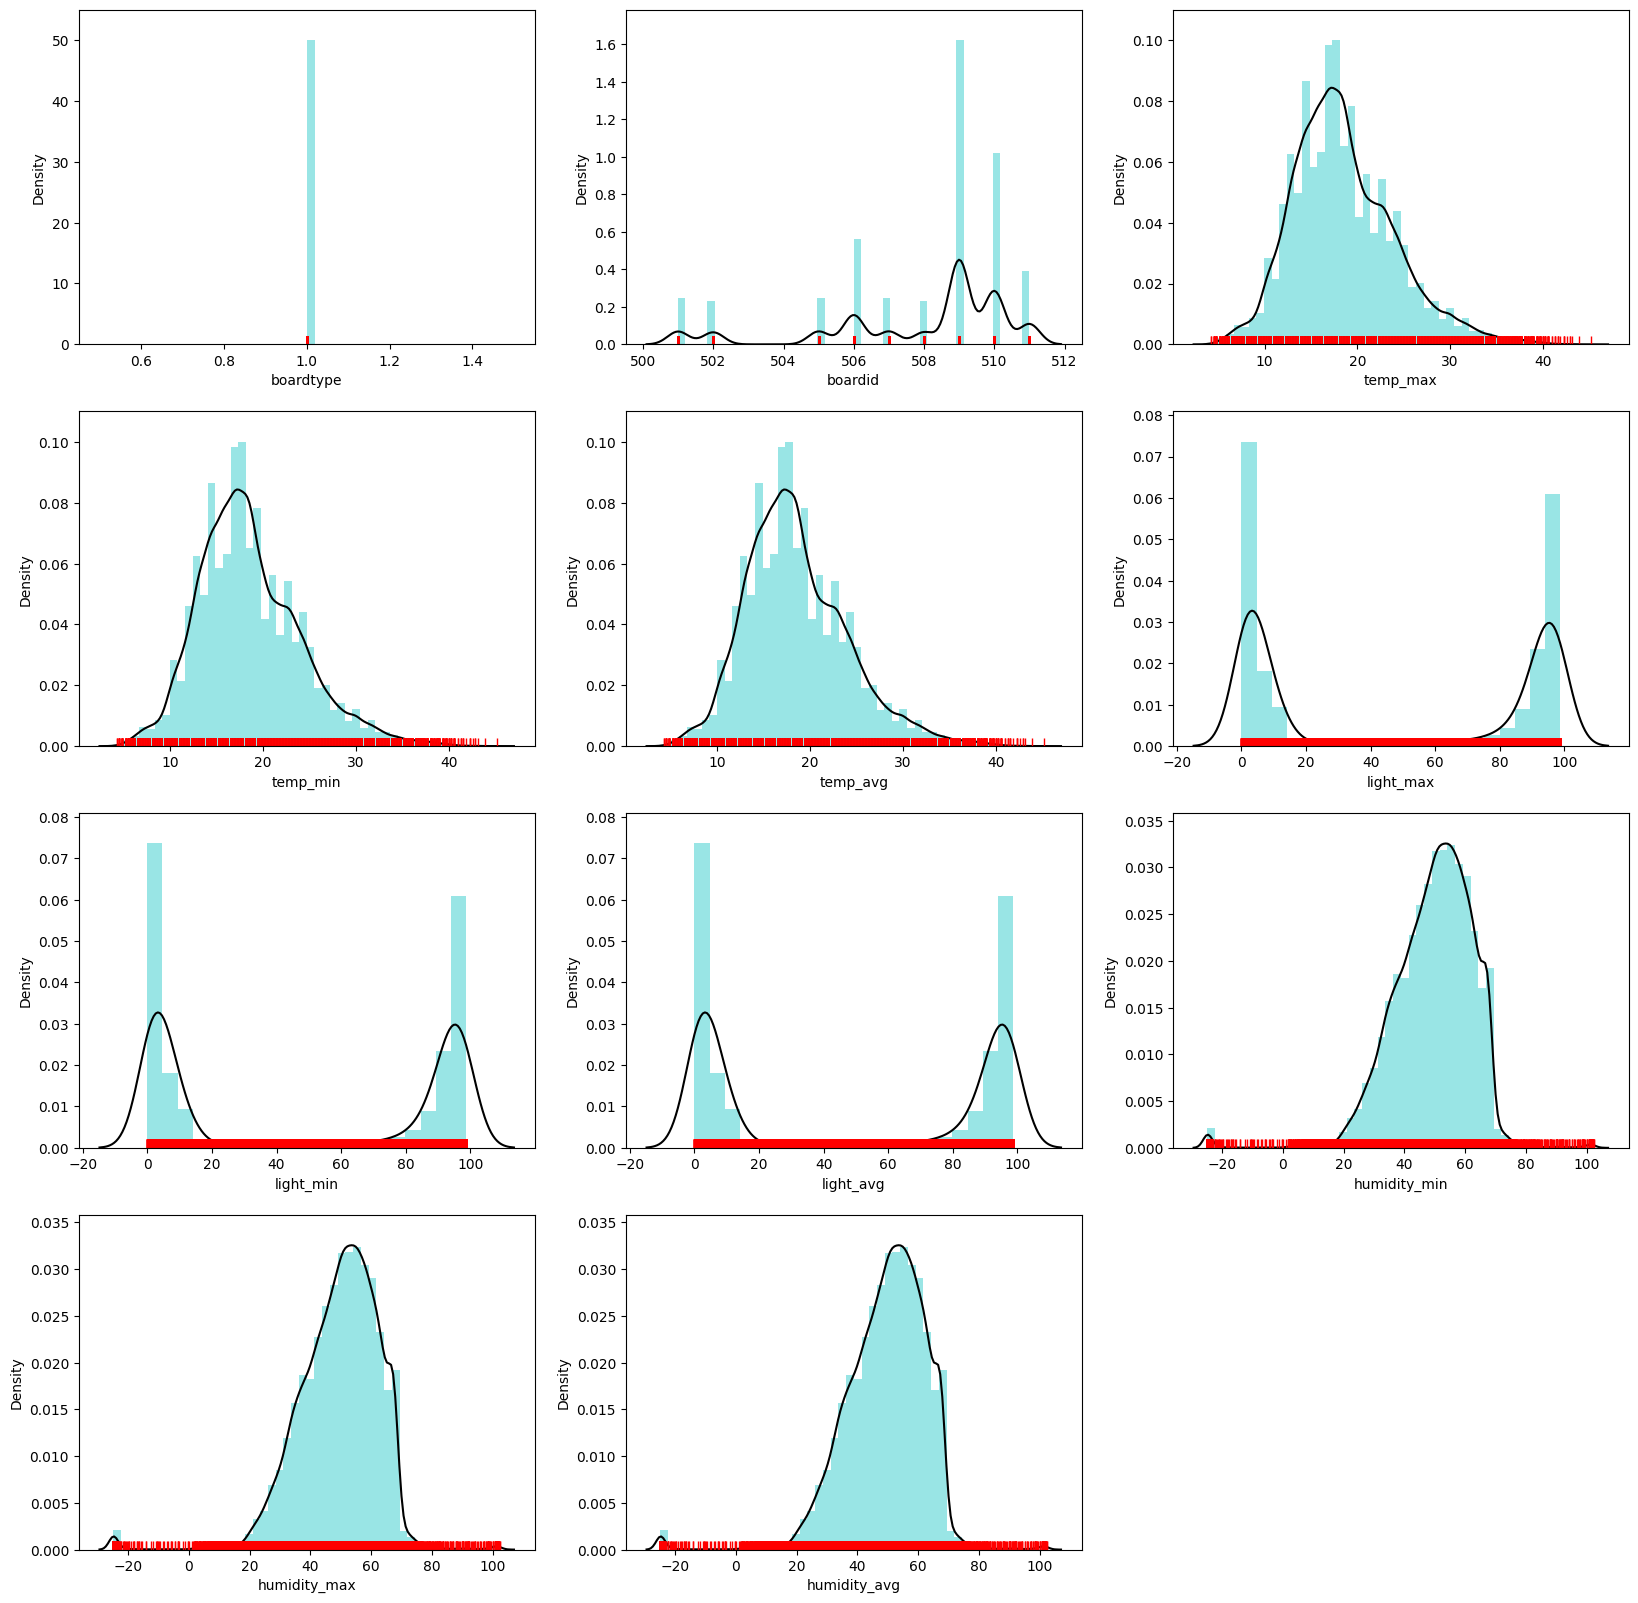

In [80]:
# Check for distribution skewness
beforescaling = ['boardtype', 'boardid' ,'temp_max', 'temp_min', 'temp_avg','light_max', 'light_min','light_avg', 'humidity_min', 'humidity_max', 'humidity_avg']
plt.figure(figsize=(20,20))
index = 1
for col in dataframe[beforescaling]:
    plt.subplot(4,3,index)
    sns.distplot(dataframe[col], rug=True, kde=True,
                 rug_kws={"color": "r"},
                 kde_kws={"color": "k"},
                 hist_kws={"color": "c"})
    index += 1

In [128]:
# import module
from sklearn.preprocessing import MinMaxScaler
# scale features
aftscaling = ['boardtype', 'boardid' ,'temp_max', 'temp_min', 'temp_avg','light_max', 'light_min','light_avg', 'humidity_min', 'humidity_max', 'humidity_avg']
scaler = MinMaxScaler()
for col in dataframe[aftscaling]:
  model = scaler.fit(dataframe[[col]])
  scaled_data=model.transform(dataframe[[col]])

index += 1

# print scaled features
print(scaled_data)

[[0.60910518]
 [0.58948195]
 [0.64992151]
 ...
 [0.68602826]
 [0.62009419]
 [0.64913658]]


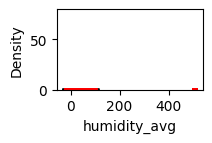

In [130]:
for cols in dataframe[aftscaling]:
  plt.subplot(4,3,index)
  sns.distplot(dataframe[cols], rug=True, kde=True,
                 rug_kws={"color": "r"},
                 kde_kws={"color": "k"},
                 hist_kws={"color": "c"})

Yes, Before and After scaling there is a difference.

In [93]:
# scale features
scaler = MinMaxScaler()
model = scaler.fit(dataframe[['boardid']])
scaled_data=model.transform(dataframe[['boardid']])

# print scaled features
print(scaled_data)

[[0.9]
 [1. ]
 [0.8]
 ...
 [0.8]
 [0.9]
 [0.4]]


In [94]:
# scale features
scaler = MinMaxScaler()
model = scaler.fit(dataframe[['temp_max']])
scaled_data=model.transform(dataframe[['temp_max']])

# print scaled features
print(scaled_data)

[[0.37073171]
 [0.37804878]
 [0.37804878]
 ...
 [0.33902439]
 [0.31463415]
 [0.32926829]]


In [95]:
# scale features
scaler = MinMaxScaler()
model = scaler.fit(dataframe[['temp_min']])
scaled_data=model.transform(dataframe[['temp_min']])

# print scaled features
print(scaled_data)

[[0.37073171]
 [0.37804878]
 [0.37804878]
 ...
 [0.33902439]
 [0.31463415]
 [0.32926829]]


In [96]:
# scale features
scaler = MinMaxScaler()
model = scaler.fit(dataframe[['temp_avg']])
scaled_data=model.transform(dataframe[['temp_avg']])

# print scaled features
print(scaled_data)

[[0.37073171]
 [0.37804878]
 [0.37804878]
 ...
 [0.33902439]
 [0.31463415]
 [0.32926829]]


In [97]:
# scale features
scaler = MinMaxScaler()
model = scaler.fit(dataframe[['light_max']])
scaled_data=model.transform(dataframe[['light_max']])

# print scaled features
print(scaled_data)

[[0.00911854]
 [0.10739615]
 [0.03140831]
 ...
 [0.03546099]
 [0.01317123]
 [0.03140831]]


In [98]:
# scale features
scaler = MinMaxScaler()
model = scaler.fit(dataframe[['light_min']])
scaled_data=model.transform(dataframe[['light_min']])

# print scaled features
print(scaled_data)

[[0.00911854]
 [0.10739615]
 [0.03140831]
 ...
 [0.03546099]
 [0.01317123]
 [0.03140831]]


In [99]:
# scale features
scaler = MinMaxScaler()
model = scaler.fit(dataframe[['light_avg']])
scaled_data=model.transform(dataframe[['light_avg']])

# print scaled features
print(scaled_data)

[[0.00911854]
 [0.10739615]
 [0.03140831]
 ...
 [0.03546099]
 [0.01317123]
 [0.03140831]]


In [100]:
# scale features
scaler = MinMaxScaler()
model = scaler.fit(dataframe[['humidity_min']])
scaled_data=model.transform(dataframe[['humidity_min']])

# print scaled features
print(scaled_data)

[[0.60910518]
 [0.58948195]
 [0.64992151]
 ...
 [0.68602826]
 [0.62009419]
 [0.64913658]]


In [101]:
# scale features
scaler = MinMaxScaler()
model = scaler.fit(dataframe[['humidity_max']])
scaled_data=model.transform(dataframe[['humidity_max']])

# print scaled features
print(scaled_data)

[[0.60910518]
 [0.58948195]
 [0.64992151]
 ...
 [0.68602826]
 [0.62009419]
 [0.64913658]]


In [102]:
# scale features
scaler = MinMaxScaler()
model = scaler.fit(dataframe[['humidity_avg']])
scaled_data=model.transform(dataframe[['humidity_avg']])

# print scaled features
print(scaled_data)

[[0.60910518]
 [0.58948195]
 [0.64992151]
 ...
 [0.68602826]
 [0.62009419]
 [0.64913658]]


<Axes: ylabel='Density'>

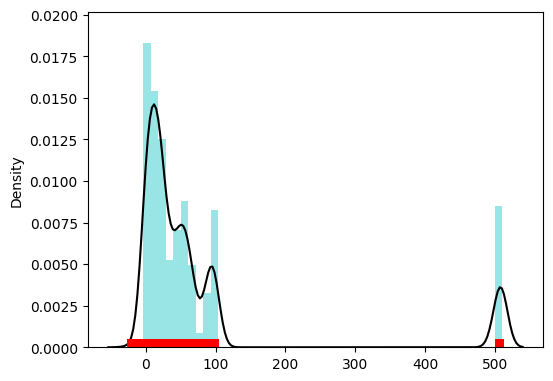

In [131]:
# Check for distribution skewness
afterscaling = ['boardtype', 'boardid' ,'temp_max', 'temp_min', 'temp_avg','light_max', 'light_min','light_avg', 'humidity_min', 'humidity_max', 'humidity_avg']
plt.figure(figsize=(20,20))
plt.subplot(4,3,index)
sns.distplot(dataframe[afterscaling], rug=True, kde=True,
                 rug_kws={"color": "r"},
                 kde_kws={"color": "k"},
                 hist_kws={"color": "c"})


In [50]:
dataframe.head()

,timestamp,mac,boardtype,boardid,temp_max,temp_min,temp_avg,light_max,light_min,light_avg,...,humidity_avg,model,latitude,longitude,elevation,location,rowid,Position,geolocation,location_cat
0,2015-01-24T16:15:00+05:30,0013a20040b31571,1,510,19.4,19.4,19.4,0.9,0.9,0.9,...,52.7,ENV,-37.819712,144.941325,0.03,Docklands Library,510-20150124104500,NaN,"-37.8197121, 144.9413253",0
1,2015-01-24T16:45:00+05:30,0013a20040b5b337,1,511,19.7,19.7,19.7,10.6,10.6,10.6,...,50.2,ENV,-37.819500,144.941889,0.03,Docklands Library,511-20150124111500,NaN,"-37.8195002, 144.9418888",0
2,2015-01-24T16:45:00+05:30,0013a20040b31583,1,509,19.7,19.7,19.7,3.1,3.1,3.1,...,57.9,ENV,-37.819904,144.940485,0.03,Docklands Library,509-20150124111500,NaN,"-37.8199043, 144.9404851",0
3,2015-01-24T17:25:00+05:30,0013a20040b31583,1,509,19.7,19.7,19.7,3.1,3.1,3.1,...,53.7,ENV,-37.819904,144.940485,0.03,Docklands Library,509-20150124115500,NaN,"-37.8199043, 144.9404851",0
4,2015-01-24T17:25:00+05:30,0013a20040b31571,1,510,18.7,18.7,18.7,1.0,1.0,1.0,...,48.6,ENV,-37.819712,144.941325,0.03,Docklands Library,510-20150124115500,NaN,"-37.8197121, 144.9413253",0
